Link to the Deployment Video:
https://www.youtube.com/watch?v=F9q_7uqdl-c

# Final Model Prediction

In [1]:
# Importing the required Libraries
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pickle
import cv2

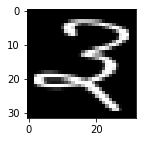

In [2]:
# Loading the Input Image
image = cv2.imread('/content/12628.png')
plt.figure(figsize=(2,2))
plt.imshow(image)

In [3]:
# Loading the Class names
open_file = open(r"/content/drive/MyDrive/HindiCharacterRecognition_Labels", "rb")
labels = pickle.load(open_file)
open_file.close()

In [4]:
def reshape(image):
  if len(image.shape) >= 3:
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

  return np.expand_dims(cv2.resize(image,(32,32),interpolation=cv2.INTER_AREA),axis=[0,-1])

image = reshape(image)

In [5]:
%time
# Loading the TF lite model
interpreter = tf.lite.Interpreter(model_path='/content/drive/MyDrive/TF_Lite_Model.tflite')
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# Predicting the Character for given input image
interpreter.allocate_tensors()
interpreter.set_tensor(input_details[0]['index'], image.astype(np.float32))
interpreter.invoke()
tflite_model_predictions = interpreter.get_tensor(output_details[0]['index'])
prediction_classes = np.argmax(tflite_model_predictions, axis=1)
prediction_classes = labels[prediction_classes[0]]

CPU times: user 2 µs, sys: 1 µs, total: 3 µs
Wall time: 5.25 µs


In [6]:
# printing the predicted image
print('The Predicted Character is "', prediction_classes, '"')

The Predicted Character is " 3 "
